In [7]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
database = [
    '../database/earnings_2022-01-01_2023-01-01.csv',
    '../database/histPos_2022-01-01_2023-01-01.csv',
    '../database/trades_2022-01-01_2023-01-01.csv'
]

In [226]:
earnings = (
    pd.read_csv(database[0])
    .assign(data = lambda x: pd.to_datetime(x.dataPagamento))
    .rename(columns={"totalNegociado": "valorRendimento"})
    [['data','valorRendimento']]
    .groupby(['data']).sum()
)

In [138]:
positions = (
    pd.read_csv(database[1])
    .rename(columns={"date": "data"})
    .loc[lambda x: x['tipoProduto'] == 'Acao']
    .assign(data = lambda x: pd.to_datetime(x.data))
    [['data','valorAtualizado']]
    .groupby('data').sum()
)

In [88]:
def defineBuyOrSell(df):
    def converter(valor,tipoMovimentacao):
        if tipoMovimentacao == 'Compra':
            return valor
        else:
            return -1 * valor
    df['valor'] = df.apply(lambda x: converter(x.valor, x.tipoMovimentacao), axis='columns')
    return df

#### TODO
- Test with different types of mercado
- Test with different types tipoMovimentacao, see if positive and negative values are working

In [142]:
trades = (
    pd.read_csv(database[2])
    .loc[lambda x: x['mercado'] == 'Mercado à Vista']
    .assign(data = lambda x: pd.to_datetime(x.data))
    .pipe(defineBuyOrSell)
    .rename(columns={"valor": "valorMovimentacao"})
    #Discarded columns: nomeInstituicao, codigoNegociacao, quantidade, preco, vencimento, tipoMovimentacao, mercado
    [['data','valorMovimentacao']]
    .groupby('data').sum()
)

<AxesSubplot: xlabel='data'>

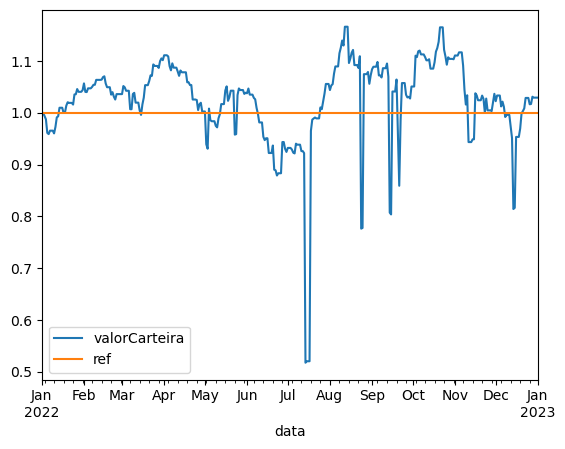

In [237]:
(
    positions
    .merge(trades, on='data',how='left')
    .merge(earnings, on='data',how='left')
    .pipe(addFirstItem)
    .fillna(0)
    .assign(valorBase=lambda x: x.loc[x.index[0],'valorAtualizado'])
    .assign(valorMovimentacao=lambda x: x.valorMovimentacao.cumsum())
    .assign(valorRendimento=lambda x: x.valorRendimento.cumsum())
    .assign(valorBaseAcum= lambda x: x.valorMovimentacao + x.valorBase - x.valorRendimento)
    .assign(valorCarteira = lambda x: x.valorAtualizado / x.valorBaseAcum)
    .assign(ref = 1)
    [['valorCarteira','ref']]
).plot()

In [241]:
earnings

,valorRendimento
data,
2022-01-03,10.000
2022-01-14,80.760
2022-01-27,74.110
2022-02-01,11.510
2022-02-14,86.780
2022-03-02,11.510
2022-03-09,69.670
2022-03-11,72.110
2022-03-15,87.980
